<center>
<div style="max-width:400px;">

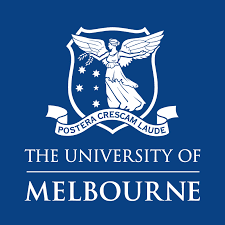

</div>
</center>

# Hypothesis Testing Notebook

**Prof. Kevin Otto and Nikolas Crossan**  
The University of Melbourne  
Department of Mechanical Engineering

----------------------------------------------------------------------------

Herein are code blocks on hypothesis tests.  This includes 
1. parametric hypothesis tests,
2. sample size calculators, and
3. non-parametric statistical tests.

This notebook relies on the `mqr-quality` code library, found at https://pypi.org/project/mqr-quality/

In [ ]:
import mqr
from mqr.plot import Figure
import mqr.nbtools as nb
from mqr.nbtools import hstack, vstack, Line

import numpy as np
import pandas as pd
import seaborn as sns


from importlib.metadata import version
print('MQR version', version('mqr-quality'))
print('Numpy version ', version('numpy'))
print('Scipy version ', version('scipy'))
print('Pandas version ', version('pandas'))
print('Seaborn version ', version('seaborn'))

# 1.0 Hypothesis Tests

The following hypothesis tests are demonstrated.


| Test        | Purpose | Null | MQR Library                |
|-------------|:-------:|:----:|:---------------------------|
| Anderson Darling | Data follows a distribution | follows | mqr.inference.dist.test_1sample |
| One Sample Z-test | Mean vs a target | $$ \mu = \mu_0 $$ | mqr.inference.mean.test_1sample |
| One Sample t-test | Mean vs a target | $$ \mu = \mu_0 $$ | mqr.inference.mean.test_1sample |
| One Sample $\chi^2$-test | Sigma vs a target | $$ \sigma = \sigma_0 $$ | mqr.inference.variance.test_1sample |
| Two Sample $F$-test | Two variances | $$ \sigma^2_1 = \sigma^2_2 $$ | mqr.inference.variance.test_2sample |
| Paired $t$-test | Two means of paired data | $$ \mu = \mu' $$ | mqr.inference.mean.test_paired |
| Two Sample $t$-test | Two means | $$ \mu_1 = \mu_2 $$ | mqr.inference.mean.test_2sample |
| One Sample Proportion test | Proportion vs a target | $$ \pi = \pi_0 $$ | mqr.inference.proportion.test_1sample |
| Two Sample Proportion test | Two Proportions | $$ \pi_1 = \pi_2 $$ | mqr.inference.proportion.test_2sample |
| One Sample Rate test | Rate vs a target | $$ \rho = \rho_0 $$ | mqr.inference.rate.test_1sample |
| Two Sample Rate test | Two Rates | $$ \rho_1 = \rho_2 $$ | mqr.inference.rate.test_1sample |


---------------------------------------------------------------------------------------------------
## 1.1 Normality Test

Computes the Anderson Darling normality test.  Below is lamp efficiency data from a sample of electric lamps.  Is the population from which the sample is draw normally distributed?  The `mqr.inference.dist` has the code for testing distributions.

In [ ]:
data = np.array([
    86.4, 86.3, 86.8, 86.4, 86.6, 86.7, 86.0, 86.6, 86.2, 86.3
    ])

mqr.inference.dist.test_1sample(data, 'ad-norm')

A different approach is to use the statistical summary function `mqr.summary` where the AD statistic and p-value is computed.  We can do a normal probability plot to see how normal the data appears, and show it side-by-side with the sample data summary.  

In [ ]:
data = np.array([
    86.4, 86.3, 86.8, 86.4, 86.6, 86.7, 86.0, 86.6, 86.2, 86.3
    ])

sample = mqr.summary.Sample(data)

# `reliability` is a great library, but doesn't allow much flexibility in plotting.
# Here, let `reliability` create the figure, then adjust it for our purposes.
# `fig.set_size_inches(...)` has the same arguments as `matplotlib.pyplot.subplots(figsize=...)` and `mqr.plot.Figure(...)`
from reliability.Probability_plotting import Normal_probability_plot
fig = Normal_probability_plot(failures=data)
fig.set_size_inches(5, 5)
ax = fig.get_axes()[0]
ax.set_xlabel('Lamp Efficiency')
ax.set_ylabel('quantile')
plot = mqr.nbtools.grab_figure(fig)

hstack(plot, sample)

-----------------------------------------------------------------------------------------------
## 1.2 One Sample t-test

The next code block computes a one-sided t-test for whether the population mean from which the sample is drawn is 86.5, with an alternative that the population mean is less than 86.5.  Recall the data must be normal to use the t-test, which we confirmed above. For this one sample t-test, we use the code `mqr.inference.mean.test_1sample`:

In [ ]:
data = np.array([
    86.4, 86.3, 86.8, 86.4, 86.6, 86.7, 86.0, 86.6, 86.2, 86.3
    ])
hyp = 86.5 # hypothesized mean

mqr.inference.mean.test_1sample(data, H0_mean=hyp, method='t', alternative='less')

Ther result is $p=0.195 > 0.05$, the p-value is not low, so we cannot reject the null hypothesis.  This sample of data indicates the population average is not significantly different that 86.5.  An interesting view of this result is to plot the confidence interval, the hypothesized value and the sample histogram.

In [ ]:
ci = mqr.inference.mean.confint_1sample(data, conf=0.95, bounded='above')

with Figure(4, 4, 2, sharex=True, height_ratios=[4, 1]) as (fig, ax):
    sns.histplot(data, ax=ax[0])
    mqr.plot.confint(ci, ax=ax[1], hyp_value=86.5)
    ax[1].set_xlabel('Lamp efficiency')
    plot = nb.grab_figure(fig)

nb.hstack(plot, ci)

What this shows is the sample average blue dot, the confidence interval for the population average, and the hypothesized value red dot. It confirms that we cannot reject the null hypothesis that the population mean, which is anywhere within the confidence interval, is different from the hyopothesized mean red dot. 

The red dot hypothesized value (86.5) is in the confidence interval, indicating a p-value greater than $\alpha$ and to not reject the null, there is no significant difference between the red dot and the population average.  If the hypothesized value red dot were on the confidence limit, the p-value would be exactly $\alpha$. If the hypothesized value red dot were larger than the upper confidence limit, the p-value would be less than $\alpha$ indicating to reject the null, there is a significant difference between the hypothesized mean red dot and the population average which is within the confidence interval. 

--------------------------------------

Now lets consider a two-sided confidence interval t-test on one sample of data.  Here we have a sample of data.  First we should confirm the data is drawn from a normally distributed population, left as an exercise to the student.  Then, we seek to confirm whether the population mean is 0.5. To do this, we use the function `mqr.inference.mean.test_1sample`

In [ ]:
data = np.array([
    0.48,0.46,0.64,0.54,0.69,0.64,0.44,0.71,0.37,0.63,0.61,0.71,0.41,0.68,0.52,0.62,0.55,0.58,0.66,0.64
    ])

mqr.inference.mean.test_1sample(
    data,
    H0_mean=0.5,
    alternative='two-sided',
    method='t')

This results in a p-value of $p=0.003 < 0.05$, indicating we should reject the null hypothesis. That is, the population mean from which this sample is drawn is significantly different than the hypothesized mean of 0.5.  

Next we compare the t-test to the confidence interval for the mean graphically.

In [ ]:
ci = mqr.inference.mean.confint_1sample(data, conf=0.95, bounded='both')

with Figure(4, 4, 2, sharex=True, height_ratios=[4, 1]) as (fig, ax):
   sns.histplot(data, ax=ax[0])
   mqr.plot.confint(ci, ax=ax[1], hyp_value=0.5),
   plot = nb.grab_figure(fig)

nb.hstack(plot, ci)

Here we see the hypothesized mean red dot is not within the confidence interval for the population mean, it is significantly different.  

-----------------------------------------------------------------------------------
## 1.3 One Sample Variance Test

The next set of cells computes a one sample variance test.  First the data is ensured to be normally distributed.

In [ ]:
data = np.array([
    36.1, 35.4, 34.2, 33.9, 33.5, 34.5, 35.4, 34.3, 34.0, 36.5
])

mqr.inference.dist.test_1sample(data, 'ad-norm')

This results in a $p=0.3 > 0.05$ indicating the sample data is not enough evidence that the distribution is significantly different from normal.  To understand the data, a confidence interval for the standard deviation is also calculated first.

In [ ]:
data = np.array([
    0.48,0.46,0.64,0.54,0.69,0.64,0.44,0.71,0.37,0.63,0.61,0.71,0.41,0.68,0.52,0.62,0.55,0.58,0.66,0.64
    ])

data = np.array([
    36.1, 35.4, 34.2, 33.9, 33.5, 34.5, 35.4, 34.3, 34.0, 36.5
])

ci = mqr.inference.stddev.confint_1sample(data, conf=0.95)
ci

Notice the value $\sigma = 1.0$ is within this confidence interval for the population standard deviation, so we would expect a large p-value for the hypothesis test.  Next a one sample variance test is defined and applied.  We wish to determine if the standard deviation is different from $1.0$, or that the variance is different from $1.0^2 = 1.0$. The code `mqr.inference.variance.test_1sample` is used. 

In [ ]:
hyp = 1.0         # hypothesized variance
alt = 'greater'  # 'less', 'two-sided', 'greater'

mqr.inference.variance.test_1sample(data, H0_var=hyp, alternative=alt)

Indeed, the p-value result is $p = 0.42 > 0.05$ and so we fail to reject the null hypothesis, this sample provides no evidence to reject the null hypothesis.  We "accept" there is no difference between the population standard deviation and 0.1.  

-------------------------------------------------------------------------------
## 1.4 Two Sample Variance Test

The next cells compute a two sample variance test. First the two samples are checked for normality. 

In [ ]:
data1 = np.array([
    5.4, 5.7, 7.0, 9.1, 7.9, 6.9, 6.6, 6.2, 6.6, 8.4])
data2 = np.array([
    4.3, 4.8, 5.9, 7.9, 6.8, 6.1, 5.5, 5.0, 5.7, 7.1])

hstack(
    mqr.inference.dist.test_1sample(data1, test='ad-norm'),
    mqr.inference.dist.test_1sample(data2, test='ad-norm'))

The distributions cannot be distinguished from normal by the test of the sample data.  Next, a test of whether the standard deviations are significantly different is take.  Three tests for equal variances are shown, an F-test which assumes normal data, as well as the Bartlett and Levene tests are computed.  The F-test can accept 1-sided arguments, but the bartlett and levene test can only be done currently as a 2-sided test. The code `mqr.inference.variance.test_2sample` is used. 

In [ ]:
print('Sample sigma of sample 1 = ', np.std(data1, ddof=1))
print('Sample sigma of sample 2 = ', np.std(data2, ddof=1))

hstack(
    mqr.inference.stddev.test_2sample(data1, data2, alternative='two-sided'),
    mqr.inference.variance.test_2sample(data1, data2, alternative='two-sided'),  
    mqr.inference.variance.test_2sample(data1, data2, method='bartlett'),
    mqr.inference.variance.test_2sample(data1, data2, method='levene'))

The result from all tests is large p-values, indicating an inability to reject the null. The population variances cannot be said to be significantly different based on this data. 

----------------------------------------------------------------
## 1.5 Two Sample t-test

Next we compute a two sample t-test to determine if the samples have different population means. Here the two samples are independent.

The samples must first be tested for equal variances or not (done above), and set the input `ev` accordingly.  Also set the alternative hypothesis.  

In [ ]:
print(f'Sample mean of sample 1 = {np.mean(data1):.4} with sample standade deviation of {np.std(data1, ddof=1):.4}.')
print(f'Sample mean of sample 2 = {np.mean(data2):.4} with sample standade deviation of {np.std(data2, ddof=1):.4}.')
print(f'The difference in sample means = {np.mean(data1)-np.mean(data2):.4}.')

alt = 'two-sided'   # 'less', 'two-sided', 'greater'
ev = True           # True for equal variances
method = 't'        # t-test

mqr.inference.mean.test_2sample(data1, data2, pooled=ev, alternative=alt, method=method)

This results in $p = 0.051 < 0.05$ and so we cannot reject the null hypothesis.  The population means of the two samples cannot be said to be significantly different, based on these samples. Likely a slightly larger sample size would indicate so. 

--------------------------------------------------------------------------------------
## 1.6 Paired t-test

A paired t-test is a two sample test but where the samples 1,...,n are the same sample but before and after a treatment.  Below is code to perform a two sample t-test, where the two samples are element-wise paired.

Set the alternative hypothesis.  

In [ ]:
alt = 'two-sided'   # 'less', 'two-sided', 'greater'
mqr.inference.mean.test_paired(data1, data2, alternative=alt)

Here we get a very small p-value, and so we can reject the null hypothesis of no difference, and the means are different, the treatment did affect the mean, the mean significantly shifted.  Notice this result from the exact same numerical data values in the previous 2 sample test where the different could not be rejected.  

----------------------------------------------------------------------------------
## 1.7 One Sample Defect Rate Test

A process may be monitored by counting the number of defects on each part or per unit length or per unit area, etc. The average defect rate $\lambda$ is a statistic of interest.  A one sample rate test considers whether the defect rate has changed.  Typically there may be zero, one, two, ... defects per sample, and each sample is $L$ big, such as 100m or 10m$^2$ etc.  Then the average defect rate is $\lambda = \frac{c}{n L}$.

Below is code to perform a one sample rate-test to compare sample defect rate versus a hypothesized (perhaps historical) defect rate.

Define the number of defects in the sample $c$, the number of samples $n$, the 'length' $L$ of each sample, and the alternative hypothesis.

Suppose the historical defect rate is 0.1 defects per unit.  Suppose today we observed 13 defects (sometimes none, sometimes one per unit, sometimes 2 per unit) total over 100 units built.  Has the defect rate gone up? 

In [ ]:
trate = 0.1      # target or reference defect rate (defects per ...)
c = 13           # observed defects
n = 100          # number of samples
L = 1            # 'length' of the observation. length, area, ...

mqr.inference.rate.test_1sample(
    count=c,
    n=n,
    meas=L,
    H0_rate=trate,
    alternative='greater')

We see the p-value of the test is $p = 0.2 > 0.05$ and so we cannot reject the null hypothesis, we 'accept' there is no difference between the sample data and a defect rate of 0.1 defects per unit.  

------------------------------------------------------------------------------------
## 1.8 Two Samples Defect Rates Test

Below is an example of performing a two samples rate-test to determine whether the defect rate of one sample is different from the defect rate of another sample. Define the number of defects in each sample, the number of samples, the 'length' of each sample, and the alternative hypothesis.  

For example, suppose in a sample of 150 parts, each of length 1.0, there were 20 total defects observed (some parts had zero defects, some had 1 defect, some had 2 defects, etc., and the sum of defects over all 150 parts was 20 defects).  Suppose in a second sample of 150 parts, each of length 1.0, there were 39 total defects.  Is there a difference in average defect rate in the populations from which the samples were drawn?  

Below is code to compute the test using the exact and normal-approximation approaches.

In [ ]:
n1 = 150         # sample size one
c1 = 20          # observed defects sample 1
L1 = 1.0         # 'length' of the observation. length, area, ...
n2 = 150         # sample size one
c2 = 39          # observed defects sample 1
L2 = 1.0         # 'length' of the observation. length, area, ...

hstack(
    # Equivalent to manual code
    mqr.inference.rate.test_2sample(c1, n1, c2, n2, L1, L2, alternative='two-sided', compare='ratio', method='exact-cond'),
    # statsmodels defaults
    mqr.inference.rate.test_2sample(c1, n1, c2, n2, L1, L2, alternative='two-sided'))

Using either test, the p-values are low.  The defect rates are different. 

--------------------------------------------------------------------------------------
## 1.9 One Proportion Test

An example of a test of a sample proportion defective versus a hypothesized (historical) defective rate.  Define the sample size, number of defectives in the sample, the hypothesized defective proportion, and the alternative hypothesis.  

For example, suppose in a sample of 100 parts, 3 defectives were observed.  The historical defective proportion is 1%. Has the defective proportion increased?  

In [ ]:
count = 3      # number of observed defectives in the sample
nobs = 100     # sample size
prop = 0.01    # Hypothesized proportion
alt = 'greater' # 'less', 'two-sided', 'greater'

print('Sample estimate of the proportion:', count/nobs)
mqr.inference.proportion.test_1sample(count, nobs, H0_prop=prop, alternative=alt)

Here we see that, despite the defective proportion being 3X larger than the historical defective proportion, the p-value remains high, $p = 0.8 > 0.05$, and we cannot reject the null hypothesis. We cannot say the defective proportion has increased, the sample size is too small.

-----------------------------------------------------------------------------------------------
## 1.10 Two Proportion Test

Next is a test of two defective proportions, one sample defective proportion versus another independent sample.
Define the sample sizes, number of defectives in each sample, and the alternative hypothesis.

Here suppose one sample of 100 units has 3 defective, and another later sample has 0 defective.  Has the defective proportion changed?  

In [ ]:
count1 = 3
nobs1 = 100
count2 = 0
nobs2 = 100
alt = 'two-sided'   # 'less', 'two-sided', 'greater'
method = 'agresti-caffo'     # 'wald', 'agresti-caffo', 'score'

print('Sample estimate of the first proportion:', count1/nobs1)
print('Sample estimate of the second proportion:', count2/nobs2)
print('Sample estimate of the proportion difference:', count1/nobs1-count2/nobs2)

mqr.inference.proportion.test_2sample(count1, nobs1, count2, nobs2, alternative=alt, method=method)

We see the p-value is large and so we cannot reject the null, we do not have evidence to say the defective proportion has changed.  

****************************************************************************
# 2.0 Sample Size Calculators

Sample size calculators are provided for the following hypothesis tests of means.


| Test              | Purpose | Math           | Python                     |
|-------------------|:-------:|:--------------:|:---------------------------|
| One sample t-test | Compare mean, $\sigma$ unknown | $$ n = \frac{(t_{1-\alpha,n-1}+t_{1-\beta,n-1})^2 s^2}{\delta^2} $$ | mqr.inference.mean.size_1sample |
| Two sample t-test | Compare means two independent samples | $$ n = \frac{2(t_{1-\alpha,n-1}+t_{1-\beta,n-1})^2 s^2}{\delta^2} $$ | mqr.inference.mean.size_2sample |
| Paired t-test | Compare means paired data  | $$ n = \frac{(t_{1-\alpha,n-1}+t_{1-\beta,n-1})^2 s_d^2}{\delta^2} $$ | mqr.inference.mean.size_paired |
| One sample $\chi^2$-test | Compare $\sigma$ | $$ n: \chi^2_{1-\alpha,n} = r^2 \chi^2_{\beta,n} $$ | mqr.inference.stddev.size_1sample |
| Two sample F-test | Compare two $\sigma$'s | $$ n: F_{1-\alpha,n_1,n_2} = r^2 F_{\beta,n_1,n_2} $$ | mqr.inference.stddev.size_2sample |
| One sample rate test | Compare $\rho$ | $$ n= \frac{\chi^2_{1-\alpha,M}}{2R_A}, \chi^2_{\alpha,M} = (\frac{R_A}{R_0})^2 \chi^2_{1-\beta,M} $$ | mqr.inference.rate.size_1sample |
| Two sample rate test | Compare $\rho$'s | $$ n= \frac{2(Z_\alpha \sqrt{R_1}+Z_\beta \sqrt{R_2})^2}{(R_1-R_2)^2} $$ | mqr.inference.rate.size_2sample |
| One sample proportion test | Compare $\pi$ | $$ n= \frac{(Z_\alpha +Z_\beta)^2}{4(\sin^{-1}\sqrt{\pi_0} - \sin^{-1}\sqrt{\pi_A})^2} $$ | mqr.inference.proportion.size_1sample |
| Two sample proportion test | Compare $\pi$'s | $$ n= \frac{2(Z_\alpha +Z_\beta)^2}{4(\sin^{-1}\sqrt{\pi_0} - \sin^{-1}\sqrt{\pi_A})^2} $$ | mqr.inference.proportion.size_2sample |



-------------------------------------------------------------------------------------------------
## 2.1 One Sample t-test Sample Size

Performs a sample size calculation needed to achieve power and confidence levels to detect a specified difference in mean.

In [ ]:
beta = 0.05    # 1 - Power
alpha = 0.05   # Significance level
effect = 1.0   # difference to detect in comparison to sigma (eg effect = delta/sigma)
alt = 'two-sided' # 'less', 'two-sided', 'greater'

mqr.inference.mean.size_1sample(
    effect=effect,
    alpha=alpha,
    beta=beta,
    alternative=alt)

Rounding up, 16 samples are needed to detect a mean shift of 1 sigma.  A reasonably small number of samples are needed to see if a process has shifted.

------------------------------------------------------------------------------------------------------------
## 2.2 Two Sample t-test Sample Size

Performs a sample size calculation needed to achieve power and confidence levels to detect a specified difference in means.

In [ ]:
beta = 0.05    # 1 - Power
alpha = 0.05   # Significance level
effect = 0.2   # difference to detect in comparison to sigma (eg effect = delta/sigma)
alt = 'two-sided' # 'less', 'two-sided', 'greater'

mqr.inference.mean.size_2sample(
    effect=effect,
    alpha=alpha,
    beta=beta,
    alternative=alt)

Rounding up, 651 samples are needed to detect a mean shift of 0.2 sigma from one sample to another.  650 in each sample.  This large number is required since such as small shift is attempting to be detected, only 0.2 sigma, this is unreasonable.  Replace the 0.2 effect with a 1.0 effect, a 1-sigma difference in means, and compute the required sample size.

------------------------------------------------------------------------------------------------------
## 2.3 Two Sample Paired t-test Sample Size

Performs a sample size calculation needed to achieve power and confidence levels to detect a specified difference in means.

In [ ]:
beta = 0.05    # 1 - Power
alpha = 0.05   # Significance level
effect = 0.2   # difference to detect in comparison to sigma (eg effect = delta/sigma)
alt = 'two-sided' # 'less', 'two-sided', 'greater'

display('NB: the sample size is the number of pairs to measure. That is, take sample_size samples from each population.')
mqr.inference.mean.size_paired(effect, alpha, beta, alt)

That is, 327 samples are needed to detect a 0.2 sigma shift if the data is paired.  The paired and single t-tests require about half as many samples as a two sample t-test.

-------------------------------------------------------------------------------------------------
## 2.4 One Sample Standard Deviation Sample Size

Performs a sample size calculation needed to achieve power and confidence levels to detect a specified difference in standard deviation.

In [ ]:
ratio = 1.2     # ratio of standard deviation from a reference target (s_0/s)
alt = 'greater' # 'less', 'two-sided', 'greater'  The alternative hypothesis
alpha = 0.05    # significance
beta = 0.05     # 1 - power

mqr.inference.stddev.size_1sample(ratio, alpha, beta, alt)

This indicates 165 samples are needed to detect if the standard deviation has grown by 20%.  Detecting variance shifts are more difficult with roughly 10X more samples than a mean shift.  Statistical control of random variability is difficult.  

----------------------------------------------------------------------------------------
## 2.5 Two Sample Standard Deviation Sample Size

Performs a sample size calculation needed to achieve power and confidence levels to detect a specified difference in standard deviation.

In [ ]:
ratio = 2.5/3.5    # Ratio of s1/s2
alpha = 0.05   # significance
beta = 0.05    # 1 - power
alt = 'less'

mqr.inference.stddev.size_2sample(ratio, alpha, beta, alt)

This indicates 98 samples are needed to detect if the standard deviation has significantly changed by 1.0 in a new sample from a sample where it was 2.5.  Again, detecting variability differences is difficult, requiring 5-10X more samples than mean difference.  

-----------------------------------------------------------------------------------------
## 2.6 One Sample Rate Sample Size

Calculate the sample size needed for determining a defect rate.

In [ ]:
rate = 3.0      
H0_rate = 2.5    
alpha = 0.05  
beta = 0.05  
alt = 'greater'

mqr.inference.rate.size_1sample(rate,H0_rate,alpha,beta,alternative=alt)

This indicates a sample size of 119 parts are needed to detect if the average defect rate has grown by 0.5 defects per unit from 2.5 defects per unit.

--------------------------------------------------------------------------------------------
## 2.7 Two Sample Rate Sample Size

Calculate the sample size needed for determining a defect rate.

In [ ]:
ra = 2.5      # Alternative rate at which to reject  # defects/(length * nobs)
r0 = 3.0      # Nominal rate to test against
alpha = 0.05  # significance
beta = 0.05    # 1 - power
alt = 'less'

mqr.inference.rate.size_2sample(
    r1=ra,
    r2=r0,
    alpha=alpha,
    beta=beta,
    H0_value=0.0,
    alternative=alt)

This indicates 238 parts are needed in each sample to determine if the average defect rate has grown by 0.5 defects per unit from a defect rate of 2.5 defects per unit.

--------------------------------------------------------------------------------------------------
## 2.8 One Proportion Sample Size

Calculates the sample size needed to detect a difference in a proportion from a target.

In [ ]:
pa = 0.02    # Larger rate at which point you reject the null
p0 = 0.03   # Hypothesized rate
alpha = 0.1 # significance
beta = 0.1  # 1 - power
alt = 'less'    # 'less', 'greater', 'two-sided'  Alternative Hypothesis

mqr.inference.proportion.size_1sample(
    pa=pa,
    H0_prop=p0,
    alpha=alpha,
    beta=beta,
    alternative=alt)

This indicates 1585 parts are needed to determine if the defective proportion has grown by 1% from a historical 2% defective proportion.  Counting defectives requires an unreasonably large sample size for detecting changes in defective proportion. 

----------------------------------------------------------------------------------------------------
## 2.9 Two Proportion Sample Size

Defines and calculates sample sizes needed to compare defective rates of two populations.

In [ ]:
p1 = 0.02         # Hypothesized rate
p2 = 0.03         # Larger rate at which point you reject the null
alpha = 0.1      # significance
beta = 0.1       # 1 - power
alt = 'less' # 'less', 'greater', 'two-sided'  Alternative Hypothesis
method = 'norm-approx' # 'norm-approx' (same as minitab/statsmodels) or 'z'

mqr.inference.proportion.size_2sample(
    p1=p1,
    p2=p2,
    alpha=alpha,
    beta=beta,
    alternative=alt,
    method=method)

This indicates 3200 parts in each sample is needed to determine if the defect rate has changed by 1% from a 2% defective rate. As before, two sample tests require twice as many units as a one sample test.

**********************************************************************************

# 3.0 Nonparametric Tests

The following non-parametric tests are demonstrated.  


| Test        | Purpose | Parametric Equivalent | Python                     |
|-------------|:-------:|:---------------------:|:---------------------------|
| Runs test | Test for randomness | Anderson-Darling | mqr.inference.nonparametric.dist.test_1sample |
| Sign test | Test for median | t-test | mqr.inference.nonparametric.median.test_1sample |
| Wlicoxon test | Test for median | t-test | mqr.inference.nonparametric.median.test_1sample |
| Levene's test | Test for equal variances | F-test | mqr.inference.nonparametric.median.test_1sample |
| Mann-Whitney test | Test for two medians | t-test | mqr.inference.nonparametric.median.test_nsample |
| Kruskal-Wallace test | Test for multiple medians | ANOVA | mqr.inference.nonparametric.median.test_nsample |




--------------------------------------------------------------------------------------------------------
## 3.1 Runs Test

The next cell performs a runs test for randomness.  This test must suceed for the subsequent non-parametric tests to be used.  

In [ ]:
data = np.array([
    12.62, 9.71, 8.59, 11.42,
    5.90, 17.86, 9.90, 16.25, 15.77, 9.45, 23.23, 
    7.60, 4.23, 6.59, 4.38, 8.60, 20.91, 6.05,
    10.90, 6.89, 8.72, 7.52, 5.64, 4.22, 4.01
    ])

co = 'median' # 'mean', 'median' the cutoff midpoint for the runs test

mqr.inference.nonparametric.dist.test_1sample(data, cutoff=co)

Also do an Anderson Darling test to confirm the data is not normal and so non-parametric tests are needed.

In [ ]:
data = np.array([
    12.62, 9.71, 8.59, 11.42,
    5.90, 17.86, 9.90, 16.25, 15.77, 9.45, 23.23, 
    7.60, 4.23, 6.59, 4.38, 8.60, 20.91, 6.05,
    10.90, 6.89, 8.72, 7.52, 5.64, 4.22, 4.01
    ])

print(f'Sample mean: {data.mean():.3f}')
print(f'Sample sigma: {data.std(ddof=1):.3f}')
mqr.inference.dist.test_1sample(data)

Here is an example of non-random data, from NIST.  It is time series deflection data during a stress test.  The data is not purely random but rather each adjacent data point are close to each other.  

A histogram of the data shows it is very non-normal.  But it is not clear that it is not random from the histogram. The runs test, on the other hand, shows that the data is very unlikely to be independent and identically distributed.

In [ ]:
url ='https://www.itl.nist.gov/div898/handbook/datasets/LEW.DAT'
df = pd.read_csv(url, skiprows=24, header=0, names=['Deflection'], dtype=np.float64)

with Figure(4, 3) as (fig, ax):
    sns.histplot(df, ax=ax)
    plot = mqr.nbtools.grab_figure(fig)

hstack(
    plot,
    mqr.inference.nonparametric.dist.test_1sample(df['Deflection'], cutoff='mean', method='runs'))

Another plot is to plot each point vs the next point.  Here you can see the generally circular displacements undergone during the test, with random movement around the circular motion.  A transformation could be used to seperate the circular motion from the random variation around it, but that is a more advanced topic.  For our purposes, the data is not random and so cannot be hypothesis tested as is.

In [ ]:
with Figure(5, 4) as (fig, ax):
    pd.plotting.lag_plot(df, alpha=0.5, ax=ax)

--------------------------------------------------------------------------------------------
## 3.2 Sign Test

Below is code to do a sign test using the statsModels sign_test function.  The null hypothesis is the two population medians are the same.  The alternative hypothesis is not equal.  

For multiple histograms on one plot, gather the samples into a dataframe and pass `multiple=dodge` to seaborn, which shows the bins side-by-side, rather than super-imposed.

In [ ]:
sample1 = np.array([2.0, 2.0, 1.0, 1.0, 3.0, 4.0, 5.0, 3.0, 1.0, 5.0])
sample2 = np.array([2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 3.0, 2.0, 1.0, 1.0])
df = pd.DataFrame(data={'sample1': sample1, 'sample2': sample2})

with Figure(5, 4) as (fig, ax):
    sns.histplot(df, multiple='dodge', ax=ax)
    plot = mqr.nbtools.grab_figure(fig)

# Display the medians alongside the plot and hypothesis test below.
# The stacking functions will render markdown, including a table.
medians_markdown = f'''
### Medians
| | |
|--- | ---:|
| sample1 | **{np.median(sample1)}** |
| sample2 | **{np.median(sample2)}** |
| delta  | **{np.median(sample1-sample2)}** |
'''

hstack(
    plot,
    hstack(
        vstack(
            mqr.inference.nonparametric.median.test_1sample(sample1-sample2, method='sign'),
            mqr.inference.nonparametric.median.test_nsample(sample1, sample2)),
        medians_markdown
    ))

-----------------------------------------------------------------------------------
## 3.3 One Sample Wilcoxon Test

This cell performs a one sample Wilcoxon test that a population median equals a reference. 

In [ ]:
data1 = np.array([
    0.0, -1.0, 1.0, 0.0, -2.0, -2.0, -2.0, -1.0, 0.0, -4.0
    ])
hyp = -1.0   # the hypothesized median.
alt = 'less' # 'less', 'two-sided', 'greater'

with Figure(4, 3) as (fig, ax):
    sns.histplot(data1, ax=ax)
    plot = mqr.nbtools.grab_figure(fig)

hstack(
    plot,
    mqr.inference.nonparametric.median.test_1sample(x=data1, H0_median=hyp, alternative=alt, method='wilcoxon'))

-----------------------------------------------------------------------------------
## 3.4 Two Sample Mann-Whitney Test

Performs a test of equal medians from two independent populations.

In [ ]:
live = np.array([
    0.8, 1.65, 35.54, 8.41, 4.15, 6.57, 1.12, 0.32, 1.16, 11.6,
    4.81, 12.54, 0.34, 1.85, 2.16, 0.87, 24.36, 3.65, 13.31, 3.88,
    0.34, 12.31, 0.4, 0.69, 3.13, 2.66, 5.85, 5.99, 0.36, 2.7,
    0.38, 2.04, 6.5, 6.32, 5.12, 4.74, 28.3, 3.5, 4.17, 2.45,
    2.44, 1.27, 0.33, 1.54, 13.34, 5.18, 19.83, 0.51, 0.33, 10.41,
    2.74, 29.95, 1.81, 1.45, 6.22, 6.15, 10.34, 1.59, 7.75, 9.76,
    4.16, 2.86, 1.38, 8.57, 0.3, 1, 3.89, 5.79, 6.01, 4.99,
    21.34, 12.34, 0.6, 1.28, 8.78, 23.36, 0.36, 5.55, 2.73, 2.6,
    0.86, 4.38, 5.09, 10.46, 1.73, 7.32, 9.3, 2.72, 3.51, 4.68,
    8.96, 9.63, 2.29, 5.48, 11.46, 6.29])
web = np.array([
    0.56, 0.36, 6.48, 13.59, 7.69, 3.96, 0.34, 0.41, 0.48, 3.6,
    20.48, 5.97, 15.08, 13.96, 10.26, 4.33, 5.36, 25.89, 0.3, 1.59,
    12.44, 0.86, 2.6, 5.76, 62.37, 5.95, 38.94, 33.61, 0.7, 4.71,
    2.56, 0.31, 8.13, 32.87, 2.03, 0.59, 0.31, 39.68, 1.28, 1.74,
    2.55, 0.32, 1.21, 10.57, 0.63, 0.31, 0.32, 4.22, 0.33, 7.12,
    2.9, 2.84, 33.42, 0.38, 4.28, 0.37, 0.96, 0.85, 22.91, 13.61,
    2.42, 0.34, 36.58, 13.38, 21.12, 3.93, 2.22, 0.31, 1.13, 2.77,
    6.42, 1.67, 2.54, 0.3, 36.07, 39.45, 39.03, 5.88, 21.32, 1.91,
    1.91, 0.33, 0.3, 0.37, 8.68, 53.94, 18.34, 0.35, 0.39, 4.24,
    1.09, 5.8, 3.09, 0.77, 59.68, 5.76
    ])
alt = 'two-sided'  # 'less', 'two-sided', 'greater'

mqr.inference.nonparametric.median.test_nsample(live, web, alternative=alt, method='mann-whitney')

-----------------------------------------------------------------------------------
## 3.5 Multiple Sample Kruskal Wallace Test

Performs a test of equal medians from several independent populations.  

In [ ]:
x = np.array([4, 2, 3, 6, 8, 2])
y = np.array([6, 3, 4, 5, 2])
z = np.array([5, 2, 6, 1, 8])

samples = [x, y, z]
names = ['x', 'y', 'z']
colors = ['C0', 'C1', 'C2']

with Figure(4, 4, len(samples), sharex=True) as (fig, axes):
    # NB: the tuple of corresponding list elements is unpacked into "data", "name", "color" and "ax"
    for sample, name, color, ax in zip(samples, names, colors, axes):
        sns.histplot(data=sample, binwidth=1.5, color=color, ax=ax)
        ax.legend(name)
        ax.set_yticks([0, 1, 2, 3])
        ax.axvline(np.median(sample), color=color)

    plot = mqr.nbtools.grab_figure(fig)

medians = f'''
|    | Medians        |
|--- |---             |
| x  | {np.median(x)} |
| y  | {np.median(y)} |
| z  | {np.median(z)} |
'''

hyptest = mqr.inference.nonparametric.median.test_nsample(x, y, z, method='kruskal-wallis')

hstack(plot, medians, hyptest)

### Notes on the `for-loop` in the last example
The `zip` function iterates over lists, producing tuples of corresponding elements.
For example:  
```
zip(['a', 'b', 'c'],
    [ 1,   2,   3])
```
produces an iterable equivalent to  
```
[('a', 1),
 ('b', 2),
 ('c', 3)]
```

In the previous example, `zip(samples, names, colors, axes)` produces an iterable of tuples like `(sample, name, color, ax)`,
making it easy to plot the corresponding samples, names and colors into sequential axes.